<div class="alert alert-block alert-info">
    <img style="float: right;" src="https://raw.githubusercontent.com/OpenSourceEconomics/ose-corporate-design/master/logos/OSE_logo_RGB.svg" width="150">
    <u><h1>Linear equations</h1></u>
</div>

The linear equation is the most elementary problem that arises in computational economic analysis. In a linear equation, an $n \times n$ matrix $A$ and an n-vector $b$ are given, and one must compute the $n$-vector $x$ that satisfies
$Ax = b$.

In [1]:
import pandas as pd
import numpy as np

from algorithms_linear import gauss_seidel
from algorithms_linear import gauss_jacobi
from algorithms_linear import forward_substitution
from algorithms_linear import backward_substitution
from algorithms_linear import solve

from benchmarks import benchmarking_alterantives

from plots_linear import plot_operation_count
from plots_linear import plot_ill_problem_2
from plots_linear import plot_iterative_convergence

from problems_linear import get_ill_problem_1
from problems_linear import get_ill_problem_2
from problems_linear import get_inverse_demand_problem
from problems_linear import get_random_problem

import time

<div class="alert alert-block alert-info">
    <u><h2>Special cases</h2></u>
</div>

We can start with some special cases to develop a basic understanding for the core building blocks for more complicated settings. Let's start with the case of a diagonal matrix $A$, where we can solve the linear equation by a simple backward or forward substition. Let's consider the following setup.

\begin{align*}
A  =  \begin{bmatrix}
   a_{11} & 0      & 0 \\
   0   & a_{22} & 0 \\
   0   & 0 & a_{33} \\
\end{bmatrix}
\end{align*}

Consider an algorithmic implementation of forward-substitution as an example.

\begin{align}
x_i = \left ( b_i - \sum_{j=1}^{i-1} a_{ij}x_j \right )/a_{ij}
\end{align}

In [2]:
def test_problem():
    A = np.tril(np.random.normal(size=(3, 3)))
    x = np.random.normal(size=3)
    b = np.matmul(A, x)
    return A, b, x


for _ in range(10):
    A, b, x_true = test_problem()
    x_solve = forward_substitution(A, b)
    np.testing.assert_almost_equal(x_solve, x_true)

 <div class="alert alert-success">
    <h3>Questions</h3>  
     <ul>
  <li>How can we make the test code more generic and sample test problems of different dimensions?</li>
  <li>Is there a way to control the randomness in the test function?</li>
    </ul> 
</div>

 <div class="alert alert-warning">
    <h3>Exercises</h3>  
     <ul>
  <li>Implement the same testing setup for the backward-substitution function.</li>
    </ul> 
</div>

We can now build on these two functions to tackle more complex tasks. This is a good example on how to develop scientific software step-by-step ensuring that each component is well tested before integrating into more involved settings.

<div class="alert alert-block alert-info">
    <u><h2>L-U Factorization</h2></u>
</div>

Most linear equations encountered in practice, however, do not have a triangular $A$ matrix. Doolittle and Crout have shown that any matrix $A$ can be decomposed into the product of a lower and upper triangular matrix $L$ and $U$, respectively $A=L \times U$ using Gaussian elimination. We will not look into the Gaussian elimination algorithm, but there is an example application in our textbook where you can follow along step by step. The L-U algorithm is designed to decompose the $A$ matrix into the product of lower and upper triangular matrices, allowing the linear equation to be solved using a combination of backward and forward substitution. Adding to this the two building blocks we developed earlier `forward_substitution` and `backward_substitution`, we can now write a quite generic function to solve systems of linear equations. 

In [3]:
??solve

Signature: solve(a, b)
Source:   
def solve(a, b):
    """Solve linear equations using L-U factorization.

    Solves a linear equation of type :math:`Ax = b` when for a nonsingular square matrix
    :math:`A` of dimension :math:`n \\times n` and vector :math:`b` of length :math:`n`. Decomposes
    Algorithm decomposes matrix :math:`A` into the product of lower and upper triangular matrices.
    The linear equations can then be solved using a combination of forward and backward
    substitution.

    Two stages of the L-U algorithm:

    1. Factorization using Gaussian elimination: :math:`A=LU` where :math:`L` denotes
    a row-permuted lower triangular matrix. :math:`U` denotes a row-permuted upper
    triangular matrix.

    2. Solution using forward and backward substitution. The factored linear equation of step 1 can
    be expressed as

    .. math::

       Ax = (LU)x = L(Ux) = b

    The forward substitution algorithm solves :math:`Ly = b` for y. The backward substitution
    al

Let's see if this is actually working.

In [4]:
A = np.array([[3, 1], [1, 2]])
x_true = np.array([9, 8])
b = np.matmul(A, x_true)
x_solve = solve(A, b)
np.testing.assert_almost_equal(x_true, x_solve)

While working in priniple, the results from this function are very numerically unstable as it does not exploit any pivoting strategies. Building your own numerical routines is usually the only way to really understand the algorithms and learn about all the potential pitfalls. However, the default should be to rely on battle-tested production code. For linear algebra there are numerous well established libraries available.Building your own numerical routines is usually the only way to really understand the algorithms and learn about all the potential pitfalls. However, the default should be to rely on battle-tested production code. For linear algebra there are numerous well established libraries available.

How does solving a system of linear equations by an $L-U$ decomposition compare to other alternatives of solving the system of linear equations.

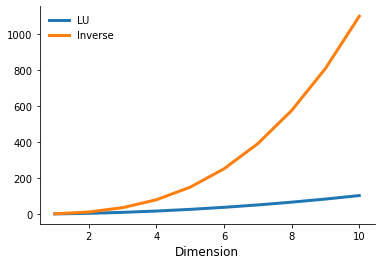

In [5]:
plot_operation_count()

The right setup for your numerical needs depends on your particular problem. For example, this trade-off looks very different if you have to solve numerous linear equations that only differ in $b$ but not $A$. In this case you only need to compute the inverse once.

 <div class="alert alert-warning">
    <h3>Exercises</h3>  
     <ul>
  <li>Set up a benchmarking exercise that compares the time to solution for the two approaches for $m=\{1, 100\}$ and $n = \{50, 100\}$.</li>
    </ul> 
</div>

In [6]:
??benchmarking_alterantives

Signature: benchmarking_alterantives()
Docstring: <no docstring>
Source:   
def benchmarking_alterantives():
    def tic():
        return time.time()

    def toc(t):
        return time.time() - t

    print(
        "{:^5} {:^5}   {:^11} {:^11} \n{}".format(
            "m", "n", "np.solve(A,b)", "dot(inv(A), b)", "-" * 40
        )
    )

    for m in [1, 100]:
        for n in [50, 500]:
            A = np.random.rand(n, n)
            b = np.random.rand(n, 1)

            tt = tic()
            for j in range(m):
                np.linalg.solve(A, b)

            f1 = 100 * toc(tt)

            tt = tic()
            Ainv = np.linalg.inv(A)
            for j in range(m):
                np.dot(Ainv, b)

            f2 = 100 * toc(tt)
            print(" {:3}   {:3} {:11.2f} {:11.2f}".format(m, n, f1, f2))
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/linear_equations/benchmarks.py
Type:      function


Let's see how the two approaches are doing.

In [7]:
benchmarking_alterantives()

  m     n     np.solve(A,b) dot(inv(A), b) 
----------------------------------------
   1    50        0.12        0.09
   1   500        0.29        0.49
 100    50        0.27        0.02
 100   500       12.86        0.54


## Rounding error

##  ill conditioned

In [8]:
grid = [5, 10, 15]
cond = np.tile(np.nan, len(grid))
err = np.tile(np.nan, len(grid))
for i, n in enumerate(grid):
    A, b, x_true = get_ill_problem_1(n)
    x_solve = np.linalg.solve(A, b)
    cond[i] = np.linalg.cond(A)
    err[i] = np.linalg.norm(x_solve - x_true, 1)

In [9]:
df = pd.DataFrame(columns=["Condition", "Error", "Dimension"])

df["Dimension"] = grid
df["Condition"] = err
df["Error"] = cond

In [10]:
df

,Condition,Error,Dimension
0,5.759837e-13,2.616969e+04,5
1,1.611891e-06,2.106258e+12,10
2,3.532057e+02,2.582411e+21,15


In [11]:
grid = np.linspace(0.9, 1.1)
cond, err = list(), list()
for p in grid:
    A, b, x_true = get_ill_problem_2(p)
    x_solve = np.linalg.solve(A, b)

    cond.append(np.linalg.cond(A))
    err.append(np.linalg.norm(x_solve - x_true, 1))

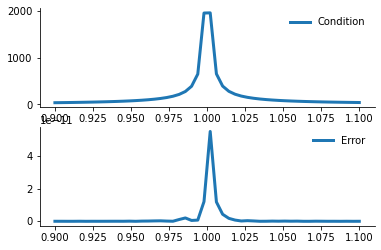

In [12]:
plot_ill_problem_2(cond, err, grid)

## Iterative methods


In [13]:
A, b, x_true = get_inverse_demand_problem()

### Gaus Jacobi

In [14]:
x_solve, conv_gj = gauss_jacobi(A, b)

In [15]:
x_solve, x_true

(array([6., 4.]), array([6., 4.]))

### Gauss Seidel

In [16]:
x_solve, conv_gs = gauss_seidel(A, b)

We can now compare the two methods.

In [17]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

x = solve(A, b)
# Test that correct.
np.allclose(np.dot(A, x), b)

True

<div class="alert alert-block alert-info">
    <u><h2>Software</h2></u>
</div>

* https://www.pardiso-project.org/

* http://www.netlib.org/lapack/http://www.netlib.org/lapack/


<div class="alert alert-block alert-info">
    <u><h2>References</h2></u>
</div>

* Doolittle and Crout* Doolittle and Crout